### L'equipe :
- RAHMOUNI Ahmed
- ZAROUKI Hamza
- ADIL Ayoub
- MOUKADDIME Nouhaila

---
# TP d'introduction à la programmation dynamique
---
---

|   | |   |
|---|---|---|
| Bellmann l'initiateur de la méthode : | | 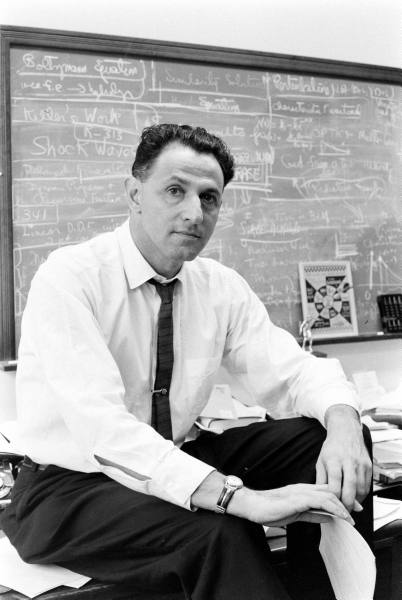 |

Il y a des blocs de code et des blocs de markdown déjà placés, mais vous pouvez en ajouter afin de mieux organiser votre travail.

Vos codes doivent être testés, et les test visibles


---
# 1. Suite de Fibonacci


<img src="https://cdn.mos.cms.futurecdn.net/ayVLPf27bUj9VdZmCbGg5K-650-80.jpg" width="400" height="200" />
***
[[Micmaths] Tuto Maths & Cuisine : Fibonacci et le nombre d'or](https://www.youtube.com/watch?v=tNwxQZSwrKM)


[[Micmaths] Le nombre d'or](https://www.youtube.com/watch?v=DxmFbdp7v9Q)

---

Afin de s'échauffer et se famialiariser à la résolution de problèmes via la programmation dynamique, cette première partie va la mettre en oeuvre sur un cas très simple, la suite de Fibonacci défine par le schéma de récurrence :

$$\left\{\begin{matrix} \forall n \in  IN, \; f_{n+2} = f_{n+1} + f_n \\f_0 = 0 \\ f_1 = 1 \end{matrix} \right.$$

## 1.1. Ecrire un code de $f$ en récursif

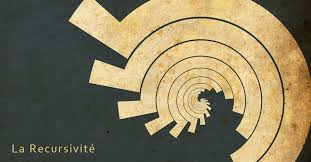 

Il est important que ce premier code implémente exactement la définition donnée ci dessus, sans aucune optimisation.

In [372]:
# code de f sans optimisation
def fibo(n):
    if n <= 1 :
        return n
    else :
        return fibo(n-1)+fibo(n-2)
        
    

In [373]:
fibo(35)

9227465

## 1.2. En utilisant le module graphviz, représenter le multi-graphe des appels
[Graphviz](https://graphviz.readthedocs.io/en/stable/manual.html)
- les noeuds du graphe sont étiquettés par les entiers sur lesquels $f$ est appliquée
- un arc de (p) à (q)  indique que la fonction qui a été appelée avec le paramètre 'p' appelle la fonction avec le paramètre (q)

Par exemple, comme $f(12) = f(11) + f(10)$, calculer $f(12)$ générera des arcs (12)-->(11) et (12)-->(10). 
             
C'est bien un multi-graphe, il va y avoir plusieurs arcs entre certains noeud.

In [374]:

from graphviz import Graph
# code pour tracer le multi-graphe des appels
# code de f sans optimisation

def fibo_graph(n, dot= Graph()):
    dot.node(str(n))
    if n <= 1 :
        return n, dot
    else :
        dot.node(str(n-1))
        dot.node(str(n-2))
        dot.edge(str(n),str(n-1))
        dot.edge(str(n),str(n-2))
        return fibo_graph(n-1, dot) + fibo_graph(n-2, dot) , dot
        
    

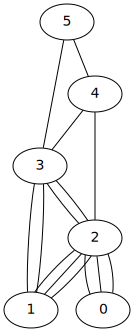

In [375]:
v, g  = fibo_graph(5)
display(g)

*** vos commentaires...

le 5 appel 4 et 3
le 4 appel 3 et 2 


le nombre d'arc sortants de n a n-1 est egale au nombre d'arc entrant a n
==> il sort 2 fois plus d'arc que ce qu'il rentre

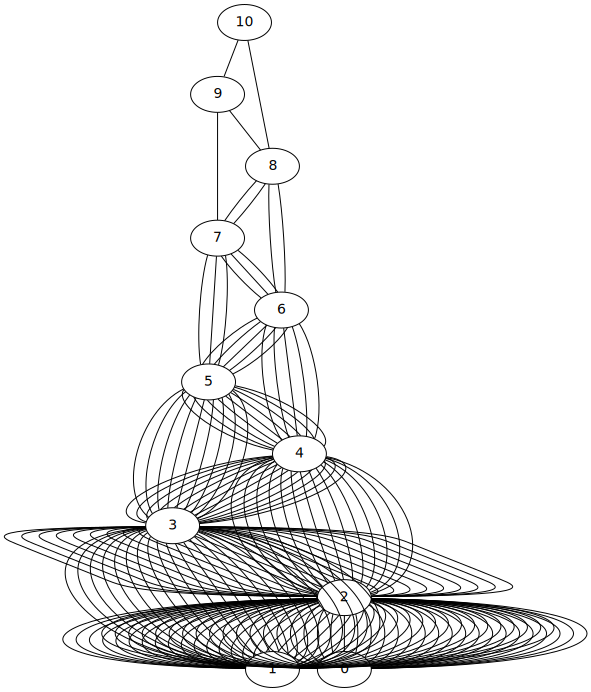

In [376]:
v, g  = fibo_graph(10)
display(g)

## 1.3. Etude empirique de la complexité
- Réaliser la représentation graphique du nombre d'appels à fibo en fonction de $n$.
- Déterminer par essai/erreur une équation de courbe approximant le tracé précédant (je vous aide : la réponse pourrait faire apparaître du $\phi_n = \left(\frac{1+\sqrt{5}}{2}\right)^n$, et pour ceux qui veulent une approximation encore plus fine, ajouter un terme en $\frac{1}{\phi_n}$)

In [377]:
def fibo_count(n):
    if n <= 1 :
        return n, 1
    else :
        v_1,n_1 = fibo_count(n-1)
        v_2,n_2 = fibo_count(n-2)
        return v_1 + v_2 , n_1 + n_2 + 1
        
    

In [378]:
# Code de la fonction qui produit le graphique du nombre d'appels à 'f' en fonction de 'n'
tab_n = list(range(30))
tab_nb_op = list(map(lambda n: fibo_count(n)[1], tab_n))


<AxesSubplot:>

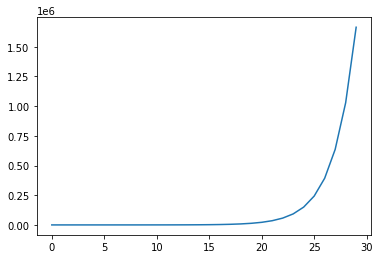

In [379]:
import seaborn as sns
sns.lineplot(x=tab_n,y=tab_nb_op)

In [380]:
# code de la recherche d'une expression approximant le nombre d'appels

<AxesSubplot:>

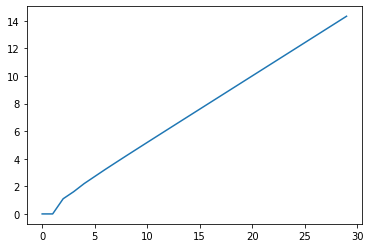

In [381]:
import numpy as np
tab_nb_op_log = list(map(np.log, tab_nb_op))
sns.lineplot(x=tab_n, y=tab_nb_op_log)

*** votre analyse...

si droite parfaite ,log (nb_op) s'ecrit a*n+b ,
a = 14/30 =~ 0.5 , b=0

log(nb_op) =~  0.5*n + 0

nb_op = exp(0.5*n) = exp(0.5)^n = 1.6487212707001282^n

In [382]:
np.exp(0.5)

1.6487212707001282

On cherche a, b, c, d, e, f, ....  

nb_op = a*(phi^n) + b*(1/phi^n) = c*n^2 + d*n + e*log(n+1) + f*1 # + g*...

Il faut beaucoup moins de coefficient que de donnees.  

Par rapport a ce qu'on cherche on fait une recherche lineare car on cherche les coefficient de la forme lineaire

In [383]:
#en cherche np
import pandas as pd

phi = (1+np.sqrt(5))/2

data = pd.DataFrame(tab_n, columns = ["n"])
data["phi^n"]= data.apply(lambda ligne : phi**ligne[0], axis = 1)
data["1/phi^n"]= data.apply(lambda ligne : 1/phi**ligne[0], axis = 1)
data["n^2"]= data.apply(lambda ligne : ligne[0]**2, axis = 1)
data["log(n+1)"]= data.apply(lambda ligne : np.log(ligne[0]+1), axis = 1)
data["1"]= data.apply(lambda ligne : 1, axis = 1)
display(phi)
display(data.head())

1.618033988749895

,n,phi^n,1/phi^n,n^2,log(n+1),1
0,0,1.000000,1.000000,0.0,0.000000,1
1,1,1.618034,0.618034,1.0,0.693147,1
2,2,2.618034,0.381966,4.0,1.098612,1
3,3,4.236068,0.236068,9.0,1.386294,1
4,4,6.854102,0.145898,16.0,1.609438,1


<AxesSubplot:>

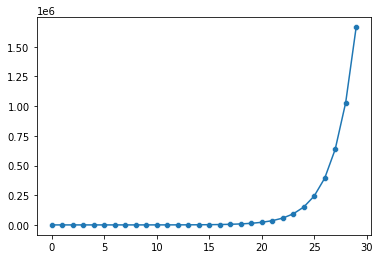

In [384]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(data, tab_nb_op)
tab_nb_op_approx = model.predict(data)

sns.lineplot(x=tab_n,y=tab_nb_op)
sns.scatterplot(x=tab_n,y=tab_nb_op_approx)

In [385]:
display(model.coef_)

array([ 0.67020627,  1.44721411, -6.58471348, -0.01071309, -5.27788845,
        0.        ])

le modele trouvee est :  

##### nb_op = 1.44*(phi^n) - 6.58*(1/phi^n) + -0.011*n^2 + 0.67*n + -5.27*log(n+1) + 0.1*1 # + g*... selon l'etude  experimentale

Attention : les termes phi^n ets tellement plus grand que les autres

## 1.4. Mémoïsation

<img src="https://photos.abweb.com/websites_data/rtl9/upload/programmes/total-recall/jaquette/totalrecall-jaquette.jpg" width="200" height="200" />


Rappel : la mémoïsation consiste à stocker les résultats calculés, de façon à ne pas avoir à les recalculer si on en a besoin à nouveau. La structure de données python 'dictionnaire' est bien adaptée pour stocker les résultats déjà calculés.

Ce dictionnaire possède pour clefs les paramètres d'appel et pour valeurs le résultat de la fonction appelée avec ces paramètres.

Selon votre aisance en algorithmique et en python, implémenter la mémoïsation de votre fonction récursive par l'une des méthodes suivantes :
- ré-écrire votre fonction récursive, en implémentant la mémoïsation 
    - piste 1 : ajouter le dictionnaire comme paramètre d'entrée suplémentaire
    - piste 2 : utilisation d'une closure (fermeture en français) : créer un dictionnaire ; dans le code de la fonction, avant d'appeler la fonction sur un sous problème, regarder dans le dictionnaire si la valeur a déjà été calculée ;  si elle ne correspond à aucune entrée du dictionnaire, la calculer et la stocker dans le dictionnaire ; utiliser la valeur stockée dans le dictionnaire.
- utiliser un décorateur, c'est certainement la solution la plus élégante car elle peut être parfaitement générique (attention à **bien** comprendre ce que vous faites et à expliquer clairement la magie...)

### Attention : Utiliser seulement la methode 1

In [386]:
# # Vos codes pour la mémoisation methode 2
# # on commence avec  un dictionnaire de taille 30 fibo
# tab_n = list(range(30))
# tab_fibo = list(map(lambda n: fibo(n), tab_n))

# dico = dict.fromkeys(tab_n)
# for i in tab_n:
#     dico[i] = tab_fibo[i]
    
    
# def fibo_memo1(n, dico):
#     if n in dico.keys():
#         return dico[n]
#     else:
#         dico[n] = fibo(n)
#     return dico[n] 

In [387]:
# Vos codes pour la mémoisation methode 1
def fibo_memo(n, dico=dict()):
    if n not in dico:  
        if n <= 1 :
            dico[n] = n
        else :
            v1 = fibo_memo(n-1, dico)
            v2 = fibo_memo(n-2, dico)
            dico[n]= v1 + v2
    return dico[n]

    

In [388]:
tab_n = list(range(30))
tab_fibo = list(map(lambda n: fibo(n), tab_n))

newDico = dict.fromkeys(tab_n)
for i in range(30):
    newDico[i] = tab_fibo[i]

display(fibo_memo(45, newDico)) # works with 2000
display(1.44*phi**200) # ordre de grandeur de calcul sans memorisation est de 11^20


1134903170

9.034217500868783e+41

Bien expliquer **votre** solution, avec __**vos**__ mots, et si vous avez choisi la solution avec décorateur, mettez le doigt sur les propriétés de Python qui autorisent ce mécanisme (la même chose ne fonctionnerait pas en c++ par exemple)

*** vos explications ...

La 1 methode prend en argument n le nombre quand veut calculer son fibo , et un dico optionnel .  

Si le dico n'est pas passer en parametre, cela veut dire quand va creer un nouveau dico en le remplissant avec la fibo de n   
Si le dico est passer en parametre , on verifie si n existe dans le dico , si oui on le envoie sa valeur du dico , sinon on la recalcule par recursion tout les fibo du dernier nombre du dico jusqua n et on les ajoutes au dico avant le retourner 

## 1.5. Utiliser graphviz pour représenter le graphe des appels sur la fonction mémoïsée
NB : le multi-graphe est maintenant un graphe !

In [389]:
# votre code pour produire le multi-graphe des appels
def fibo_memo_graph(n, dico=dict(), dot=Graph()):
    dot.node(str(n))
    if n not in dico:  
        if n <= 1 :
            dico[n] = n, dot
        else :
            dot.node(str(n-1))
            dot.node(str(n-2))
            dot.edge(str(n),str(n-1))
            dot.edge(str(n),str(n-2))
            v1 = fibo_memo_graph(n-1, dico, dot)
            v2 = fibo_memo_graph(n-2,dico, dot)
            dico[n]= v1 + v2
    return dico[n], dot

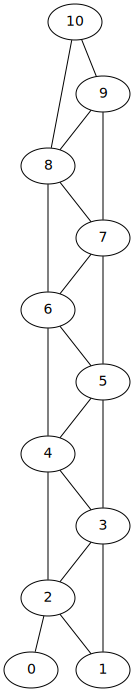

In [390]:
v, g = fibo_memo_graph(10)
display(g)


*** vos commentaires...

## 1.6. Refaire l'étude de complexité empirique dans le cas de la fonction mémoïsée


In [391]:
# votre code
def fibo_count_memo(n, dico=dict()):
    if n not in dico:      
        if n <= 1 :
            return dico[n]
        else :
            v_1= fibo_count_memo(n-1, dico)
            v_2= fibo_count_memo(n-2, dico)
            dico[n] = v_1 + v_2
    return dico[n]


In [392]:
display(fibo_count_memo(10,newDico))

55

In [393]:
# Code de la fonction qui produit le graphique du nombre d'appels à 'f' en fonction de 'n'
tab_n_memo = list(range(30))
tab_nb_op_memo = list(map(lambda n: fibo_count_memo(n, newDico), tab_n_memo))

<AxesSubplot:>

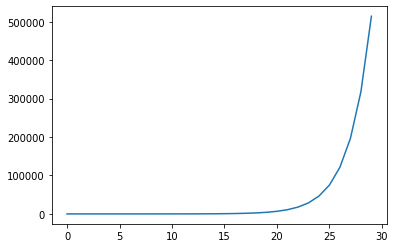

In [394]:
sns.lineplot(x=tab_n_memo,y=tab_nb_op_memo)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

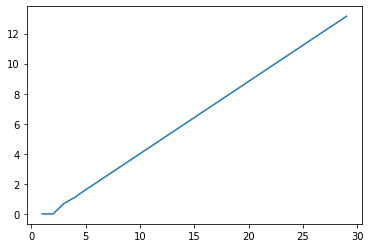

In [395]:
tab_nb_op_log_memo = list(map(np.log, tab_nb_op_memo))
sns.lineplot(x=tab_n_memo, y=tab_nb_op_log_memo)

Cette courbe est un tout petit peut mieux que la precedente (particulierement pour n < 5)

*** votre analyse...

si droite parfaite ,log (nb_op) s'ecrit a*n+b ,
a = 10/22.1 =~ 0.45 , b=0

log(nb_op) =~  0.45*n + 0

nb_op = exp(0.45*n) = exp(0.45)^n = 1.568312185490169^n

In [396]:
np.exp(0.45)

1.568312185490169

On cherche a, b, c, d, e, f, ....  

nb_op_memo = a*(phi^n) + b*(1/phi^n) = c*n^2 + d*n + e*log(n+1) + f*1

In [397]:
phi = (1+np.sqrt(5))/2

data_memo = pd.DataFrame(tab_n_memo, columns = ["n"])
data_memo["phi^n"]= data_memo.apply(lambda ligne : phi**ligne[0], axis = 1)
data_memo["1/phi^n"]= data_memo.apply(lambda ligne : 1/phi**ligne[0], axis = 1)
data_memo["n^2"]= data_memo.apply(lambda ligne : ligne[0]**2, axis = 1)
data_memo["log(n+1)"]= data_memo.apply(lambda ligne : np.log(ligne[0]+1), axis = 1)
data_memo["1"]= data_memo.apply(lambda ligne : 1, axis = 1)
display(phi)
display(data_memo.head())

1.618033988749895

,n,phi^n,1/phi^n,n^2,log(n+1),1
0,0,1.000000,1.000000,0.0,0.000000,1
1,1,1.618034,0.618034,1.0,0.693147,1
2,2,2.618034,0.381966,4.0,1.098612,1
3,3,4.236068,0.236068,9.0,1.386294,1
4,4,6.854102,0.145898,16.0,1.609438,1


<AxesSubplot:>

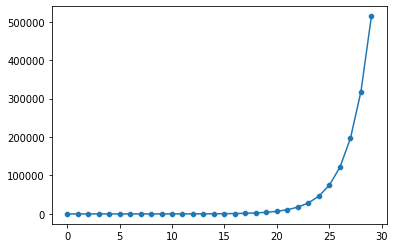

In [398]:
model_memo = LinearRegression().fit(data_memo, tab_nb_op_memo)
tab_nb_op_approx_memo = model_memo.predict(data_memo)

sns.lineplot(x=tab_n_memo ,y=tab_nb_op_memo)
sns.scatterplot(x=tab_n_memo,y=tab_nb_op_approx_memo)

In [399]:
display(model_memo.coef_)

array([-0.54220827,  0.44721318,  5.32714511,  0.00866707,  4.26990145,
        0.        ])

*** vos commentaires...


le modele trouvee est :  

##### nb_op = 0.45*(phi^n) + 5.33*(1/phi^n) + 0.008*n^2 - 0.54*n + -4.27*log(n+1) + 0.1*1 # + g*... selon l'etude  experimentale

# 1.7. Programmation dynamique
Le passage à la programmation dynamique va consister à ne conserver que les résultats nécessaires (contrairement à la mémoïsation qui les conserve tous) et à trouver un ordre d'évaluation qui permet de n'en conserver à chaque instant que le strict minimum.

Ecrire le programme mettant en oeuvre cet objectif.

In [400]:
# votre code
def fibo_dyna(n):
    if n <= 1 :
        return n 
    else :
        prec, prec_prec = 1,0
        for _ in range(1,n):
            prec, prec_prec = prec + prec_prec, prec
        return prec

In [401]:
def fibo_count_dyno(n):    
    if n <= 1 :
        return n
    else :
        prec = fibo_count_dyno(n-1)
        prec_prec = fibo_count_dyno(n-2)
        ret = prec + prec_prec
        return ret


In [402]:
print(list(map(lambda n : fibo(n) == fibo_dyna(n), tab_n)))
print(sum(map(lambda n : fibo(n) == fibo_dyna(n), tab_n)))


[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
30


*** vos commentaires ...  
avant la boucle O(1)  
'+ O(n)  
= O(n)

# 1.8. Refaire l'étude empirique de complexité sur cette nouvelle fonction

<AxesSubplot:>

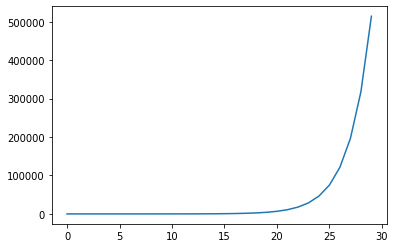

In [403]:
# votre code
tab_n_dyno = list(range(30))
tab_nb_op_dyno = list(map(lambda n: fibo_count_dyno(n), tab_n_dyno))

sns.lineplot(x=tab_n_dyno,y=tab_nb_op_dyno)



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

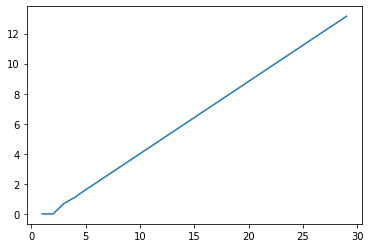

In [404]:
tab_nb_op_log_dyno = list(map(np.log, tab_nb_op_dyno))
sns.lineplot(x=tab_n_dyno, y=tab_nb_op_log_dyno)

Cette courbe est presque la meme que la precedente

*** votre analyse...

si droite parfaite ,log (nb_op) s'ecrit a*n+b ,
a = 10/22.5 =~ 0.444 , b=0

log(nb_op) =~  0.44*n + 0

nb_op = exp(0.44*n) = exp(0.44)^n =1.552707218511336^n

In [405]:
np.exp(0.44)

1.552707218511336

On cherche a, b, c, d, e, f, ....  

nb_op_memo = a*(phi^n) + b*(1/phi^n) = c*n^2 + d*n + e*log(n+1) + f*1

1.618033988749895

,n,phi^n,1/phi^n,n^2,log(n+1),1
0,0,1.000000,1.000000,0.0,0.000000,1
1,1,1.618034,0.618034,1.0,0.693147,1
2,2,2.618034,0.381966,4.0,1.098612,1
3,3,4.236068,0.236068,9.0,1.386294,1
4,4,6.854102,0.145898,16.0,1.609438,1


<AxesSubplot:>

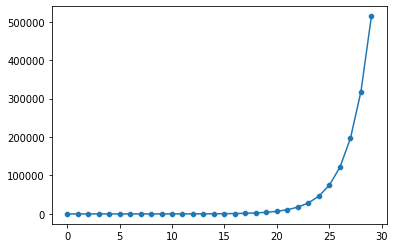

In [406]:
phi = (1+np.sqrt(5))/2

data_dyno = pd.DataFrame(tab_n_dyno, columns = ["n"])
data_dyno["phi^n"]= data_dyno.apply(lambda ligne : phi**ligne[0], axis = 1)
data_dyno["1/phi^n"]= data_dyno.apply(lambda ligne : 1/phi**ligne[0], axis = 1)
data_dyno["n^2"]= data_dyno.apply(lambda ligne : ligne[0]**2, axis = 1)
data_dyno["log(n+1)"]= data_dyno.apply(lambda ligne : np.log(ligne[0]+1), axis = 1)
data_dyno["1"]= data_dyno.apply(lambda ligne : 1, axis = 1)
display(phi)
display(data_dyno.head())

model_dyno = LinearRegression().fit(data_dyno, tab_nb_op_dyno)
tab_nb_op_approx_dyno = model_dyno.predict(data_dyno)

sns.lineplot(x=tab_n_dyno ,y=tab_nb_op_dyno)
sns.scatterplot(x=tab_n_dyno,y=tab_nb_op_approx_dyno)

In [407]:
display(model_dyno.coef_)

array([-0.54220827,  0.44721318,  5.32714511,  0.00866707,  4.26990145,
        0.        ])

*** vos commentaires...

le modele trouvee est :  

##### nb_op = 0.44*(phi^n) + 5.32*(1/phi^n) + 0.008*n^2 - 0.54*n + -4.27*log(n+1) + 0.1*1 # + g*... selon l'etude  experimentale

# 2. Distance d'édition
---
---

| | | |
|---|---|---|
| Elle peut servir à déterminer la distance entre deux brins d'ADN | | 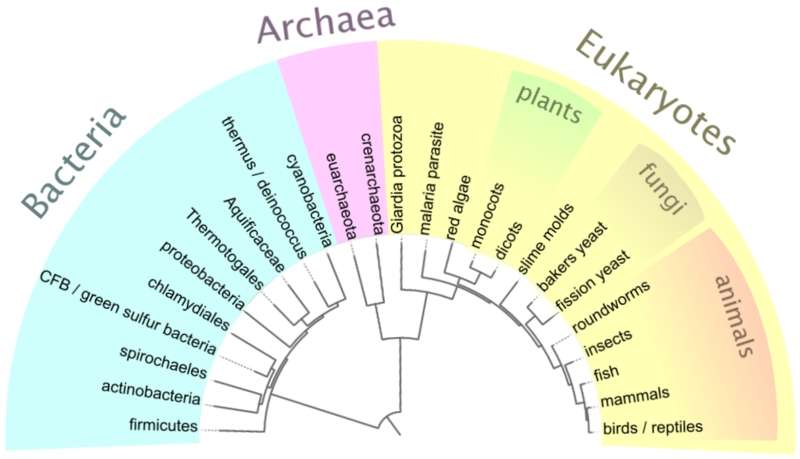 |


Soient $M$ et $P$ deux chaînes de caractères. La distance d'édition entre $M$ et $P$ est le nombre minimal d'opérations permettant de transformer $M$ en $P$, les opérations étant prises parmi :
- substitution d'un caractère de M par un caractère différent de P (coût $c_s>0$)
- insertion dans M d'un caractère de P (coût $c_i>0$)
- suppression d'un caractère de M (coût $c_d>0$)

Le but de cette partie du TP est de calculer la distance d'édition entre deux mots ainsi que de calculer une suite de transformations de coût minimal permettant de transformer un mot en un autre mot (le coût d'une transformation est la somme des coûts des opérations qui la composent).

Afin de parvenir à ce résultat, plusieurs phases vous sont demandées, présentées dans les questions suivantes.

Pour votre travail, les valeurs des coûts des opérations n'auront pas d'importance (dans des cas applicatifs ils ont évidemment de l'importance).

## 2.1. Equation de récurrence
L'équation de récurrence était fournie pour la suite de Fibonacci, ici c'est à vous de la trouver (elle est en fait dans la partie cours/TD). En général, c'est cette phase qui est la plus hardue, car 1) il faut effectivement résoudre le problème, 2) toutes les décompositions ne sont pas aisément substituables par de la programmation dynamique
1. Ecrire l'équation de récurrence
1. Justifier votre équation (ébauche de preuve de la correction de votre algorithme)

*** équation de récurrence et vos explications ***

On sait que la distance d'edition entre deux mots est le nombre minimal d'opérations permettant de transformer  𝑀 de taille m  en  𝑃 de taille p  
Par la recurrance 

L'equation :  
Difference(M[m], P[p]) = Difference(M[m-1],[p-1]) + cout(type de modification)

Justification :  (l'example le plus simple)
suppossant M = toto et P= toti , les eux de taille m = p = 4
la difference est diff(toto, toti) =  diff(tot,tot) + cout(substitution) =...=  diff(t,t) + diff(o,o) + diff(t,t) + 1 = 0 + 0 + 0 + 1




## 2.3. Ecrire une fonction récursive calculant la distance d'édition

In [431]:
# votre code de la version récursive
def distance(m1, m2, cs, ci, cd):
    if len(m2) == 0 :
        return len(m1)*ci
    elif len(m1) == 0 :
        return len(m2)*cd
    elif m1[-1] == m2[-1]:
        return distance(m1[:-1], m2[:-1], cs, ci, cd)
    else :
        vs = cs + distance(m1[:-1], m2[:-1], cs, ci, cd)
        vi = ci + distance(m1[:-1], m2, cs, ci, cd)
        vd = cd + distance(m1, m2[:-1], cs, ci, cd)
        return min(vs,vi,vd)

In [432]:

distance("toto","toti", cs=1, ci=1, cd=1)

1

## 2.4. Calculer une suite de transformations optimale permettant de transformer une chaîne en une autre
*Optimale signifie ici " de coût minimal"*

Précédemment, on se contentait de calculer la distance, maintenant on désire obtenir la suite des transformations qui permet d'effectivement transformer le premier mot en le second. La fonction doit renvoyer un affichage compact (par exemple [['s', 4, 'b'], ['d', 3], ['i', 5, 'r'], ...], aisé à manipuler informatiquement).



In [463]:
# votre code pour le calcul
def distanceOptimale(m1, m2, cs, ci, cd):
    if len(m2) == 0 :
        return len(m1)*ci, ["i 0 " + m1[k] for k in range(len(m1)-1, -1, -1)]
    elif len(m1) == 0 :
        return len(m2)*cd, ["d 0 "  for k in m2]
    elif m1[-1] == m2[-1]:
        d, op = distanceOptimale(m1[:-1], m2[:-1], cs, ci, cd)
        # return d, ["s"+ m1[-1] + " "+ str(len(m2)-1)]+ op
        return d, op
    else :
        vs ,op_s = distanceOptimale(m1[:-1], m2[:-1], cs, ci, cd)
        vs += cs
        op_s = ["s "+ m1[-1] + " "+ str(len(m2)-1)]+ op_s
        
        vi, op_i =distanceOptimale(m1[:-1], m2, cs, ci, cd)
        vi +=  ci
        op_i = ["i "+m1[-1]+ " "+str(len(m2)-1)] +op_i
        
        vd, op_d = distanceOptimale(m1, m2[:-1], cs, ci, cd)
        vd += cd 
        op_d = ["d "+m1[-1] +str(len(m2)-1)] + op_d
        
        tab_v = [vs, vi, vd]
        tab_op = [op_s, op_i, op_d]
        
        return min(tab_v), tab_op[np.argmin(tab_v)]

In [464]:
print(distanceOptimale("abc", "", cs=1, ci=1, cd=1))
print(distanceOptimale("", "abc", cs=1, ci=1, cd=1))
print(distanceOptimale("abc", "abc", cs=1, ci=1, cd=1))
print(distanceOptimale("abc", "def", cs=1, ci=1, cd=1))
print(distanceOptimale("abcdefg", "abcbfr", cs=1, ci=1, cd=1))

(3, ['i 0 c', 'i 0 b', 'i 0 a'])
(3, ['d 0 ', 'd 0 ', 'd 0 '])
(0, [])
(3, ['s c 2', 's b 1', 's a 0'])
(3, ['s g 5', 's e 3', 'i d 2'])


La sortie précédente n'est pas très conviviale, écrire une fonction qui génère à partir de la représentation compacte un affichage pertinent. Par exemple, avec des coûts de transformation tous à 1, on pourrait avoir comme affichage :
```
    Transformation de 'abcdefg' en 'abcbfr'
    Départ                                 [cout 0]            abcdefg
    Substituer à l'indice 4 par un 'b'     [cout 1] --->       abcdbfg
    Effacer le caractère d'indice 3        [cout 1] --->       abcbfg 
    Insérer à l'indice 5 le caractère 'r'  [cout 1] --->       abcbfr
                                   [cout total : 3]
   ``` 

In [489]:
# votre code pour le 'pretty print'
# operlist = distanceOptimale("abcdefg", "abcbfr", cs=1, ci=1, cd=1)

def prettyDist(word1, word2):    
    n, ops = distanceOptimale(word1, word2, cs=1, ci=1, cd=1)
    print(f"Transformation de {word2} en {word1} :")
    for i in range(len(ops)):
       
        cur = ops[i].split(" ")
        if cur[0] == "s":
            print(f"Operation {i+1} : Substitution de {cur[1]} a l'indince {cur[2]}  ---- [cout 1]")
        if cur[0] == "d":
            print(f"Operation {i+1} : Suppression du caractere a l'indice {cur[1]} ---- [cout 1]")
        if cur[0] == "i":
            print(f"Operation {i+1} : Insertion du caractere {cur[2]} a l'induce {cur[1]}  ---- [cout 1]")
    print(f"-----> Cout total  :   {n}")    
            
print("Test 1 :")
prettyDist("cwrpm3", "cpidcpq")
print("Test 2 :")
prettyDist("abcdfe", "efdg")

Test 1 :
Transformation de cpidcpq en cwrpm3 :
Operation 1 : Substitution de 3 a l'indince 6  ---- [cout 1]
Operation 2 : Substitution de m a l'indince 5  ---- [cout 1]
Operation 3 : Substitution de p a l'indince 4  ---- [cout 1]
Operation 4 : Substitution de r a l'indince 3  ---- [cout 1]
Operation 5 : Substitution de w a l'indince 2  ---- [cout 1]
Operation 6 : Suppression du caractere a l'indice c1 ---- [cout 1]
-----> Cout total  :   6
Test 2 :
Transformation de efdg en abcdfe :
Operation 1 : Substitution de e a l'indince 3  ---- [cout 1]
Operation 2 : Insertion du caractere 2 a l'induce f  ---- [cout 1]
Operation 3 : Substitution de c a l'indince 1  ---- [cout 1]
Operation 4 : Substitution de b a l'indince 0  ---- [cout 1]
Operation 5 : Insertion du caractere a a l'induce 0  ---- [cout 1]
-----> Cout total  :   5


(bonus) Au lieu d'un affichage en mode texte, on peut également générer à partir de la représebtation compacte un graphe (c'est une chaîne au sens des graphes dans ce cas) où les sommets sont étiquettés par l'état de la chaîne de caractère et les arcs par la transformation effectuée.

## 2.5. Représenter le multi-graphe des appels

In [414]:
# votre code
def distance_graph(m1, m2, cs, ci, cd, dot= Graph()):
    dot.node(m1+" "+m2)
    if len(m2) == 0 :
        return len(m1)*ci, ["i 0 " + m1[k] for k in range(len(m1)-1, -1, -1)] , dot
    elif len(m1) == 0 :
        return len(m2)*cd, ["d 0 "  for k in m2] , dot
    elif m1[-1] == m2[-1]:
        dot.node(m1[:-1]+" "+m2[:-1])
        dot.edge(m1+" "+m2,m1[:-1]+" "+m2[:-1])
        
        d, op, dot = distance_graph(m1[:-1], m2[:-1], cs, ci, cd, dot)
        # return d, ["s"+ m1[-1] + " "+ str(len(m2)-1)]+ op
        return d, op, dot
    else :
        dot.node(m1[:-1]+" "+m2[:-1])
        dot.edge(m1+" "+m2,m1[:-1]+" "+m2[:-1])
        
        vs ,op_s, dot = distance_graph(m1[:-1], m2[:-1], cs, ci, cd,dot)
        vs += cs
        op_s = ["s"+ m1[-1] + " "+ str(len(m2)-1)]+ op_s
        
        
        dot.node(m1[:-1]+" "+m2)
        dot.edge(m1+" "+m2,m1[:-1]+" "+m2)
        
        vi, op_i, dot =distance_graph(m1[:-1], m2, cs, ci, cd, dot)
        vi +=  ci
        op_i = ["i "+m1[-1]+ " "+str(len(m2)-1)] +op_i
        
        
        dot.node(m1[:-1]+" "+m2[:-1])
        dot.edge(m1+" "+m2,m1+" "+m2[:-1])
        
        vd, op_d ,dot = distance_graph(m1, m2[:-1], cs, ci, cd, dot)
        vd += cd 
        op_d = ["d "+m1[-1] +str(len(m2)-1)] + op_d
        
        tab_v = [vs, vi, vd]
        tab_op = [op_s, op_i, op_d]
        
        return min(tab_v), tab_op[np.argmin(tab_v)], dot

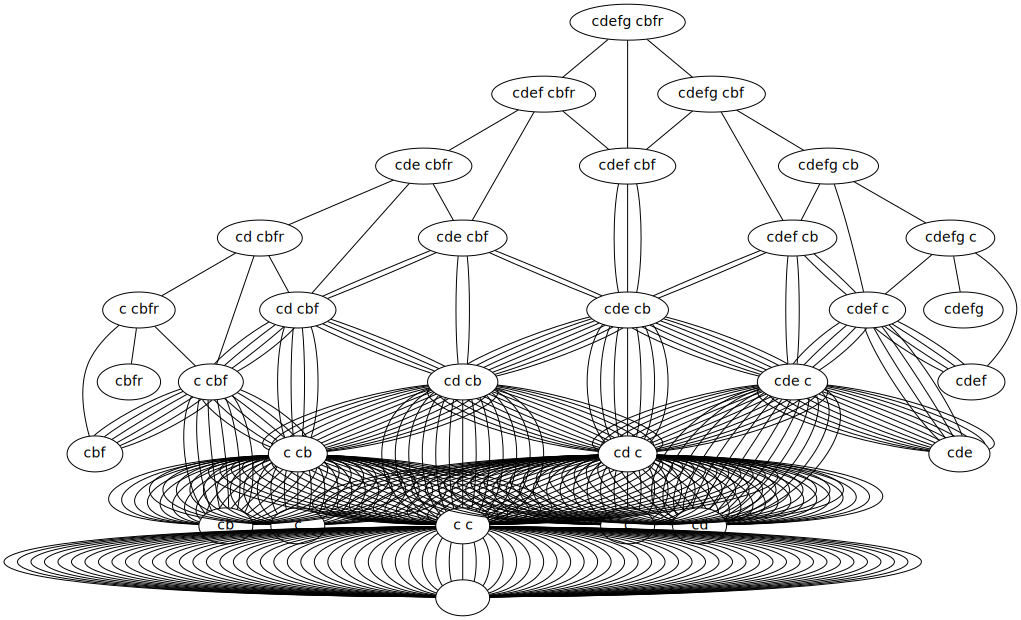

In [415]:
v, op, g1 = distance_graph("cdefg", "cbfr", cs=1, ci=1, cd=1 )
display(g1)

## 2.6. Mémoïser la fonction

In [416]:
# votre code  les cle du memo m1+" "+m2

def distance_graph_memo(m1, m2, cs, ci, cd, dot= Graph()):
    dot.node(m1+" "+m2)
    if len(m2) == 0 :
        return len(m1)*ci, ["i 0 " + m1[k] for k in range(len(m1)-1, -1, -1)] , dot
    elif len(m1) == 0 :
        return len(m2)*cd, ["d 0 "  for k in m2] , dot
    elif m1[-1] == m2[-1]:
        dot.node(m1[:-1]+" "+m2[:-1])
        dot.edge(m1+" "+m2,m1[:-1]+" "+m2[:-1])
        
        d, op = distance_graph(m1[:-1], m2[:-1], cs, ci, cd, dot)
        # return d, ["s"+ m1[-1] + " "+ str(len(m2)-1)]+ op
        return d, op, dot
    else :
        dot.node(m1[:-1]+" "+m2[:-1])
        dot.edge(m1+" "+m2,m1[:-1]+" "+m2[:-1])
        
        vs ,op_s = distance_graph(m1[:-1], m2[:-1], cs, ci, cd,dot)
        vs += cs
        op_s = ["s"+ m1[-1] + " "+ str(len(m2)-1)]+ op_s
        
        
        dot.node(m1[:-1]+" "+m2)
        dot.edge(m1+" "+m2,m1[:-1]+" "+m2)
        
        vi, op_i =distance_graph(m1[:-1], m2, cs, ci, cd, dot)
        vi +=  ci
        op_i = ["i "+m1[-1]+ " "+str(len(m2)-1)] +op_i
        
        
        dot.node(m1[:-1]+" "+m2[:-1])
        dot.edge(m1+" "+m2,m1+" "+m2[:-1])
        
        vd, op_d = distance_graph(m1, m2[:-1], cs, ci, cd, dot)
        vd += cd 
        op_d = ["d "+m1[-1] +str(len(m2)-1)] + op_d
        
        tab_v = [vs, vi, vd]
        tab_op = [op_s, op_i, op_d]
        
        return min(tab_v), tab_op[np.argmin(tab_v)], dot

## 2.7. Représenter le graphe des appels de la fonction mémoïsée

In [417]:
# votre code

## 2.8. Mettre en oeuvre la programmation dynamique

In [418]:
# votre code

*** vos explications

## 2.9. Trouver une/des mesures vous permettant d'estimer le gain par rapport à la version récursive du début
Cette question n'est pas triviale, les deux chaînes ne sont pas nécessairement de la même longueur, le nombre d'appels dépend des lettres utilisées,... A vous de trouver une mesure satisfaisante qui permettra une représentation graphique mettant en évidence le gain obtenu par la programmation dynamique.

*** vos explications...

In [419]:
# votre code

*** vos commentaires...

---
# 3. Problème du compte exact
---

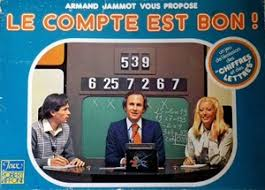

Vous disposez de pièces dont les valeurs sont dans un ensemble E d'entiers strictement positifs (par exemple $E = \{500, 200, 100, 50, 20, 10, 5, 2, 1\}$) (en quantité suffisante pour la suite, on en a autant qu'on le désire). Ecrire un programme qui calcule le nombre de façon de payer une somme N passée en argument comme somme d'éléments de E (l'ordre ne compte pas). 

Exemple pour N = 5 avec l'ensemble E = {500, 200, 100, 50, 20, 10, 5, 2, 1} :

| Combinaison | Nombre de façons |
|:----------------|-------------:|
| 1 pièce de 5 | --> 1  façon |
| 3 pièces de 1, une pièce de 2 | --> 1  façon |
| 1 pièce de 1, deux pièce de 2 | --> 1  façon |
| 5 pièces de 1  | --> 1  façon |
| TOTAL | --> 4 façons |

Les questions suivantes décomposent et précisent le problème.


## 3.1. Dénombrer 'à  la main' le nombre de façons pour différentes valeurs de votre choix
Conseils :
- Pour votre réflexion, il n'est pas nécessaire de faire varier E
- Chercher une présentation systématique de vos calculs (ce n'est pas le cas dans l'exemple ci-dessus, j'ai mélangé les lignes). Tant que vous n'avez pas une façon mécanique d'énumérer sur des exemples, il y a peu de chances que vous trouviez un algorithme
- il y a une et une seule façon de payer 0, c'est de ne rien donner (c'est une des conséquences du fait que E ne contient que des éléments strictement positifs)



*** votre énumération sur des exemples, présentée de façon à voir apparaitre un schéma récursif

## 3.2. Equation de récurrence
1. Ecrire l'équation de récurrence qui généralise votre travail dans la question précédente sur des exemples partticuliers
1. Vérifier sur les cas traités à la main la validité de votre équation de récurrence.
1. Justifier votre équation (ébauche de preuve de la correction de votre algorithme)

*** votre équation, justifications, ...

## 3.3. Ecrire une fonction récursive résolvant le problème posé

In [420]:
# votre code

## 3.4. Représenter le multi-graphe des appels

In [421]:
# votre code

*** vos explications

## 3.5. Etude de complexité empirique de la solution purement récursive
1. Représenter en fonction de $N$ le nombre d'appels à votre fonction
1. Déterminer par essai/erreur une fonction qui approche au mieux le tracé précédent

In [422]:
# Votre code pour la représentation graphique

In [423]:
# votre code pour la recherche d'une fonction approchante

## 3.6. Mémoïser la fonction récursive

In [424]:
# votre code

## 3.7. Représenter le graphe des appels de la fonction mémoïsée

In [425]:
# votre code

## 3.8. Résoudre le problème en appliquant les principes de la programmation dynamique

In [426]:
# votre code

*** vos explications...

## 3.9. Etude de complexité empirique de la solution par programmation dynamique
1. Représenter en fonction de $N$ le nombre d'appels à votre fonction
1. Déterminer par essai/erreur une fonction qui approche au mieux le tracé précédent

In [427]:
# votre code

*** vos conclusions...